In [2]:
import pandas as pd
import numpy as np

# illuminahiseq & illuminaga 데이터 불러오기
a = illuminahiseq
b = illuminaga

In [4]:
a = pd.read_table('/hdd/Correlation_Disance/mRNAseq_colon_cancer/illuminahiseq_Level_3__RSEM_genes_normalized__data.Level_3.2016012800.0.0/COAD.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.data.txt')

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252

In [ ]:
b = pd.read_table("/hdd/Correlation_Disance/mRNAseq_colon_cancer/illuminaga_Level_3_RSEM_genes_normalized_data.2016012800.0.0/COAD.rnaseqv2__illuminaga_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.data.txt")

# 행렬 치환

In [5]:
c = a.transpose()

# 행렬 치환 후, 첫 행을 컬럼명으로 삽입

## 첫 행을 컬럼명으로 삽입 후, 실제 첫 행을 삭제

In [6]:
c.columns = c.iloc[0]

In [7]:
c = c.drop(c.columns[[0]], axis = 1)

# 인덱스 열을 삭제하고 초기화

In [9]:
c.reset_index(drop = True, inplace = True)

In [10]:
c.head()

Hybridization REF,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
0,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
1,0.5174,18.0851,15.7640,144.4004,774.6615,0.0000,441.9729,1.9342,0.0000,0.0000,...,71.0832,461.315,1105.42,3.3849,543.037,6259.19,1358.32,798.356,13.0561,0
2,0.0000,4.4315,4.2767,142.6609,1185.2927,0.0000,522.0126,0.4838,0.0000,0.0000,...,39.671,366.715,1149.49,0.4838,290.76,4653.12,1220.13,333.817,1.9352,0.9676
3,0.0000,9.8995,11.3032,143.1987,888.3202,0.0000,288.0643,2.9245,0.0000,0.0000,...,31.4385,349.479,1083.53,0,669.713,4460.61,3002.01,530.068,2.1934,0
4,0.0000,7.9174,18.7608,146.1876,1280.5508,0.0000,379.5181,2.1515,0.0000,0.0000,...,54.6472,542.169,1374.35,0.4303,445.353,4190.19,1093.37,574.441,6.4544,0.4303


In [11]:
c = c.drop([0])

# 알 수 없는 컬럼 제거

In [12]:
test = [col for col in c if col.startswith('?')]

In [13]:
test2 = c

In [14]:
for i in test :
    test2 = test2.drop([i], axis = 1)

In [15]:
cor_matrix = test2.corr()

""


# 히트맵 source_code

In [ ]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Abalone Feature Correlation')
    labels=['Sex','Length','Diam','Height','Whole','Shucked','Viscera','Shell','Rings',]
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

In [ ]:
correlation_matrix(df)

# 거리간 상관관계 데이터 작성

## 상관관계 데이터는 R에서 작성함(Distance_Analysis_ver1.R 파일 참조할 것)

In [1]:
import pandas as pd
import numpy as np
import dask.dataframe as dd

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [2]:
a = pd.read_table("/hdd/Correlation_Disance/chr01_sense_distance.csv", sep = ',')

In [8]:
b = pd.read_table("/hdd/Correlation_Disance/chr01_distance_flag.csv", sep = ',')

In [2]:
x = pd.read_table("/hdd/Correlation_Disance/corr_stack.csv", sep = ',')

In [3]:
import multiprocessing as mp

In [4]:
x = pd.DataFrame(x)

In [5]:
x.columns = ['from', 'to', 'corr']

In [9]:
new_df = dd.merge(b, x, how = 'inner', on = ['from', 'to'])

In [10]:
new_df = new_df.drop(['Unnamed: 0'], axis = 1)

ValueError: labels ['Unnamed: 0'] not contained in axis

In [ ]:
new_df.head()

In [ ]:
new_df.count()

In [ ]:
def mask(df, key, value):
    return df[df[key] == value]

In [ ]:
new_df['flag'] = new_df['flag'].astype('str')
new_df['from'] = new_df['from'].astype('str')
new_df['to'] = new_df['to'].astype('str')

In [ ]:
new_df.count()

In [ ]:
%matplotlib inline
new_df.plot(x='distance', y='corr', style = 'o')

In [ ]:
dis1k_df = new_df[new_df['distance'] < 1000]
dis1k_df = dis1k_df[dis1k_df['distance'] > -1000]

In [ ]:
dis1k_df.count()

In [ ]:
dis1k_df.head()

In [ ]:
%matplotlib inline
dis1k_df.plot(x='distance', y='corr', style = 'o')

In [14]:
dis1k_df['flag'].unique()

array(['sense'], dtype=object)

In [ ]:
dis1k_df_01 = dis1k_df[(dis1k_df['corr'] >= 0.3) | (dis1k_df['corr'] <= -0.3 )]

In [16]:
HH.count()

from        427739
to          427739
distance    427739
flag        427739
corr        427739
dtype: int64

In [17]:
HH.head()

,from,to,distance,flag,corr
0,OR4F29,OR4F5,380731.0,HH,0.027622
932,LOC100132287,OR4F5,420747.0,HH,0.039072
1864,LOC100133331,OR4F5,655750.0,HH,0.007925
2796,FAM41C,OR4F5,798062.0,HH,-0.018149
3728,NOC2L,OR4F5,874194.0,HH,0.074896


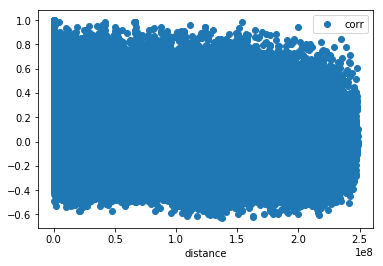

In [18]:
%matplotlib inline
HH.plot(x='distance', y='corr', style = 'o')

In [19]:
HH['distance'].corr(HH['corr'])

-0.16066987192205331

In [20]:
dis1k_df = HH[HH['distance'] < 1000]
dis1k_df = dis1k_df[dis1k_df['distance'] > -1000]

In [21]:
dis1k_df.count()

from        82
to          82
distance    82
flag        82
corr        82
dtype: int64

In [22]:
dis1k_df.head()

,from,to,distance,flag,corr
3729,NOC2L,SAMD11,-379.0,HH,-0.047676
11192,ACAP3,SCNN1D,354.0,HH,0.382684
12125,CPSF3L,PUSL1,-93.0,HH,0.533340
13058,DVL1,TAS1R3,-43.0,HH,-0.008593
16787,MRPL20,LOC148413,-151.0,HH,0.405977


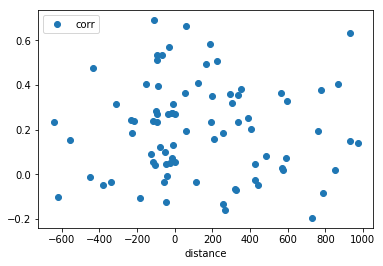

In [23]:
%matplotlib inline
dis1k_df.plot(x='distance', y='corr', style = 'o')

In [24]:
dis1k_df['distance'].corr(dis1k_df['corr'])

-0.02440043462971681

In [25]:
dis1k_df_01 = dis1k_df[(dis1k_df['corr'] >= 0.3) | (dis1k_df['corr'] <= -0.3 )]

In [26]:
dis1k_df_01.count()

from        26
to          26
distance    26
flag        26
corr        26
dtype: int64

In [27]:
dis1k_df_01.head()

,from,to,distance,flag,corr
11192,ACAP3,SCNN1D,354.0,HH,0.382684
12125,CPSF3L,PUSL1,-93.0,HH,0.533340
16787,MRPL20,LOC148413,-151.0,HH,0.405977
24252,TMEM52,CALML6,295.0,HH,0.358133
63443,MAD2L2,FBXO6,125.0,HH,0.410082


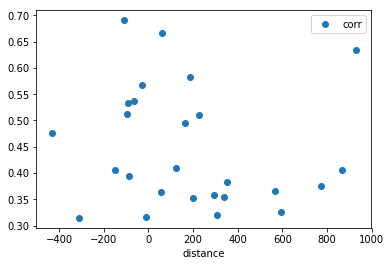

In [28]:
%matplotlib inline
dis1k_df_01.plot(x='distance', y='corr', style = 'o')

In [29]:
dis1k_df_01['distance'].corr(dis1k_df['corr'])

-0.1395528653630982

In [30]:
TT.count()

from        418503
to          418503
distance    418503
flag        418503
corr        418503
dtype: int64

In [31]:
TT.head()

,from,to,distance,flag,corr
1,OR4F29,SAMD11,474062.0,TT,-0.026784
2,OR4F29,KLHL17,508424.0,TT,0.131410
3,OR4F29,PLEKHN1,514141.0,TT,0.015706
4,OR4F29,ISG15,561788.0,TT,-0.089181
5,OR4F29,AGRN,568423.0,TT,-0.024113


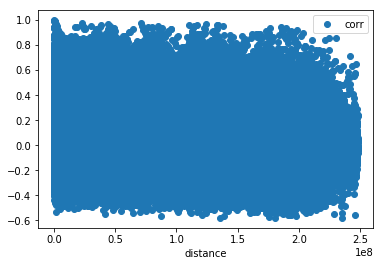

In [32]:
%matplotlib inline
TT.plot(x='distance', y='corr', style = 'o')

In [33]:
TT['distance'].corr(TT['corr'])

-0.15177636241163892

In [34]:
dis1k_df = TT[TT['distance'] < 1000]
dis1k_df = dis1k_df[dis1k_df['distance'] > -1000]

In [35]:
dis1k_df.count()

from        94
to          94
distance    94
flag        94
corr        94
dtype: int64

In [36]:
dis1k_df.head()

,from,to,distance,flag,corr
3730,NOC2L,KLHL17,803.0,TT,0.530768
8395,SDF4,B3GALT6,181.0,TT,0.118771
11193,ACAP3,PUSL1,636.0,TT,0.417146
15855,CCNL2,LOC148413,191.0,TT,0.578749
25188,MORN1,RER1,-438.0,TT,0.301446


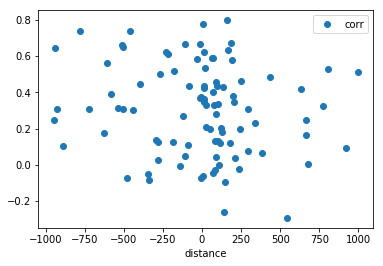

In [37]:
%matplotlib inline
dis1k_df.plot(x='distance', y='corr', style = 'o')

In [38]:
dis1k_df['distance'].corr(dis1k_df['corr'])

-0.1419645778534899

In [39]:
dis1k_df_01 = dis1k_df[(dis1k_df['corr'] >= 0.3) | (dis1k_df['corr'] <= -0.3 )]

In [40]:
dis1k_df_01.count()

from        52
to          52
distance    52
flag        52
corr        52
dtype: int64

In [41]:
dis1k_df_01.head()

,from,to,distance,flag,corr
3730,NOC2L,KLHL17,803.0,TT,0.530768
11193,ACAP3,PUSL1,636.0,TT,0.417146
15855,CCNL2,LOC148413,191.0,TT,0.578749
25188,MORN1,RER1,-438.0,TT,0.301446
34520,NPHP4,KCNAB2,-176.0,TT,0.515172


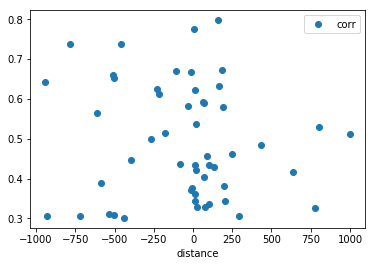

In [42]:
%matplotlib inline
dis1k_df_01.plot(x='distance', y='corr', style = 'o')

In [43]:
dis1k_df_01['distance'].corr(dis1k_df_01['corr'])

-0.08195167175360099

In [44]:
minus_in_plus.head()

,from,to,distance,flag,corr
141834,NR0B2,NUDC,-2949.0,minus_in_plus,0.204865
673640,APOBEC4,RGL1,-17267.0,minus_in_plus,-0.054277
682043,B3GALT2,CDC73,-64656.0,minus_in_plus,0.161660
781878,JMJD4,SNAP47,-7256.0,minus_in_plus,0.474535
812667,ZP4,LOC100130331,-28748.0,minus_in_plus,0.031758


In [45]:
minus_in_plus.count()

from        5
to          5
distance    5
flag        5
corr        5
dtype: int64

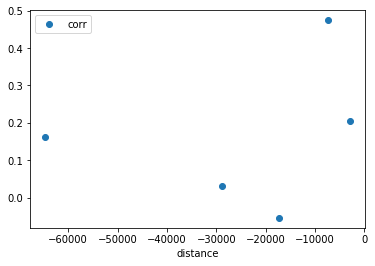

In [46]:
%matplotlib inline
minus_in_plus.plot(x='distance', y='corr', style = 'o')

In [47]:
minus_in_plus['distance'].corr(minus_in_plus['corr'])

0.2659873833932234

In [23]:
new_df = dd.merge(b, x, how = 'inner', on = ['from', 'to'])

In [24]:
new_df = new_df.drop(['Unnamed: 0'], axis = 1)

In [25]:
new_df['flag'] = new_df['flag'].astype('str')
new_df['from'] = new_df['from'].astype('str')
new_df['to'] = new_df['to'].astype('str')

In [26]:
dis1k_df = new_df[new_df['distance'] < 1000]
dis1k_df = dis1k_df[dis1k_df['distance'] > -1000]

In [27]:
dis1k_df.count()

from        36
to          36
distance    36
flag        36
corr        36
dtype: int64

In [28]:
dis1k_df_01 = dis1k_df[(dis1k_df['corr'] >= 0.3) | (dis1k_df['corr'] <= -0.3 )]

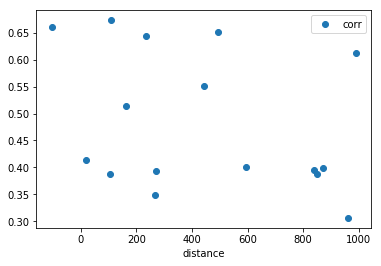

In [29]:
%matplotlib inline
dis1k_df_01.plot(x='distance', y='corr', style = 'o')

In [30]:
dis1k_df_01['distance'].corr(dis1k_df_01['corr'])

-0.3400952812657474

## asdf

In [11]:
HH = new_df[new_df['flag'] == 'HH']
TT = new_df[new_df['flag'] == 'TT']
minus_in_plus = new_df[new_df['flag'] == 'minus_in_plus']
HH_fold = new_df[new_df['flag'] == 'HH_fold']

In [12]:
HH.count()

from        427739
to          427739
distance    427739
flag        427739
corr        427739
dtype: int64

In [13]:
TT.count()

from        418503
to          418503
distance    418503
flag        418503
corr        418503
dtype: int64

In [14]:
minus_in_plus.count()

from        5
to          5
distance    5
flag        5
corr        5
dtype: int64

In [15]:
HH_fold.count()

from        9
to          9
distance    9
flag        9
corr        9
dtype: int64

In [103]:
TT_filter = TT[(TT['corr'] >= 0.3) | (TT['corr'] <= -0.3 )]

In [60]:
HH_filter = HH[(HH['corr'] >= 0.3) | (HH['corr'] <= -0.3 )]

In [61]:
HH_filter.count()

from        26
to          26
distance    26
flag        26
corr        26
dtype: int64

In [64]:
HH_filter.loc[HH_filter['corr'].idxmax()]

from           PI4KB
to            ZNF687
distance        -109
flag              HH
corr        0.690464
Name: 479585, dtype: object

In [104]:
TT_reflag = pd.DataFrame()
for i in range(1, TT_filter['corr'].count()):
    t1 = TT_filter.iloc[i]
    if t1['distance'] < 0:
        t1['flag'] = 'TT_fold'
    else:
        t1['flag'] = t1['flag']
    TT_reflag = TT_reflag.append(t1)
    print(i, '/', TT_filter['distance'].count())

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


1 / 52
2 / 52
3 / 52
4 / 52
5 / 52
6 / 52
7 / 52
8 / 52
9 / 52
10 / 52
11 / 52
12 / 52
13 / 52
14 / 52
15 / 52
16 / 52
17 / 52
18 / 52
19 / 52
20 / 52
21 / 52
22 / 52
23 / 52
24 / 52
25 / 52
26 / 52
27 / 52
28 / 52
29 / 52
30 / 52
31 / 52
32 / 52
33 / 52
34 / 52
35 / 52
36 / 52
37 / 52
38 / 52
39 / 52
40 / 52
41 / 52
42 / 52
43 / 52
44 / 52
45 / 52
46 / 52
47 / 52
48 / 52
49 / 52
50 / 52
51 / 52


In [105]:
cols = TT_reflag.columns.tolist()

In [106]:
cols = cols[-2:] + cols[:-2]

In [107]:
cols

['from', 'to', 'corr', 'distance', 'flag']

In [108]:
TT_reflag = TT_reflag[cols]

In [109]:
TT_reflag

,from,to,corr,distance,flag
11193,ACAP3,PUSL1,0.417146,636.0,TT
15855,CCNL2,LOC148413,0.578749,191.0,TT
25188,MORN1,RER1,0.301446,-438.0,TT_fold
34520,NPHP4,KCNAB2,0.515172,-176.0,TT_fold
55043,LZIC,NMNAT1,0.652253,-505.0,TT_fold
62510,FBXO2,FBXO44,0.737155,-457.0,TT_fold
64377,MTHFR,CLCN6,0.376583,-8.0,TT_fold
97042,AKR7A2,PQLC2,0.433221,99.0,TT
166092,SNRNP40,ZCCHC17,0.673824,184.0,TT
173566,ZBTB8OS,RBBP4,0.428006,134.0,TT


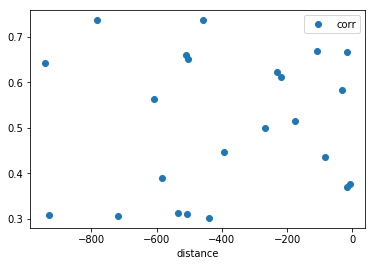

In [110]:
%matplotlib inline
TT_reflag[TT_reflag['flag'] == 'TT_fold'].plot(x='distance', y='corr', style = 'o')

In [120]:
TT_reflag.count()

from        51
to          51
corr        51
distance    51
flag        51
dtype: int64

In [119]:
TT_reflag[TT_reflag['flag'] == 'TT'].count()

from        28
to          28
corr        28
distance    28
flag        28
dtype: int64

In [115]:
TT_reflag['distance'].corr(TT_reflag['corr'])

-0.09803893778947413

In [118]:
TT_reflag[TT_reflag['flag'] == 'TT']['distance'].corr(TT_reflag[TT_reflag['flag'] == 'TT']['corr'])

-0.1167322966015718

In [101]:
HH_reflag[HH_reflag['flag'] == 'HH_fold'].count()

from        10
to          10
corr        10
distance    10
flag        10
dtype: int64

In [59]:
TT_filter = TT[(TT['corr'] >= 0.3) | (TT['corr'] <= -0.3 )]

In [60]:
TT_filter.count()

from        52
to          52
distance    52
flag        52
corr        52
dtype: int64

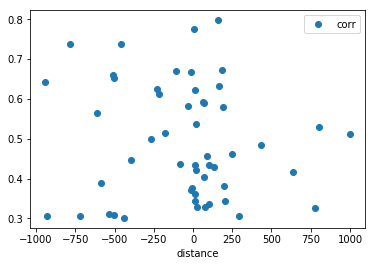

In [61]:
%matplotlib inline
TT_filter.plot(x='distance', y='corr', style = 'o')

In [62]:
TT_filter['distance'].corr(TT_filter['corr'])

-0.08195167175360099